Token from https://github.com/mr-easy/GMM-EM-Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import multivariate_normal
from GMM import GMM
import imageio
import os
from IPython.display import Image, display
import time

In [2]:
def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    '''
    Generates data from a random mixture of Gaussians in a given range.
    input:
        - k: Number of Gaussian clusters
        - dim: Dimension of generated points
        - points_per_cluster: Number of points to be generated for each cluster
        - lim: Range of mean values
    output:
        - X: Generated points (points_per_cluster*k, dim)
    '''
    x = []
    mean = random.rand(k, dim) * (lim[1] - lim[0]) + lim[0]
    for i in range(k):
        cov = random.rand(dim, dim + 10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if (dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:, 0], x[:, 1], s=3, alpha=0.4)
        ax.autoscale(enable=True)
    return x

In [3]:
def plot(title, show=False):
    '''
    Draw the data points and the fitted mixture model.
    input:
        - title: title of plot and name with which it will be saved.
    '''
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-12, 12))
    ax.set_ylim((-12, 12))

    plt.title(title)
    plt.savefig(f"./plots/{title.replace(':', '_')}")
    if show:
        plt.show()
    plt.clf()

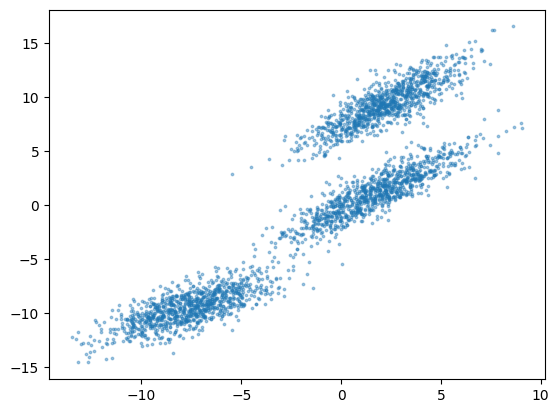

In [13]:
# Generate random 2D data with 3 clusters 
X = gen_data(k=3, dim=2, points_per_cluster=1000)

In [14]:
# Create a Gaussian Mixture Model
gmm = GMM(3, 2)

In [15]:
# Training the GMM using EM

# Initialize EM algo with data
gmm.init_em(X)
num_iters = 20
# Saving log-likelihood
log_likelihood = [gmm.log_likelihood(X)]
# plotting
plot("Iteration:  0")
for e in range(num_iters):
    # E-step
    gmm.e_step()
    # M-step
    gmm.m_step()
    # Computing log-likelihood
    log_likelihood.append(gmm.log_likelihood(X))
    print("Iteration: {}, log-likelihood: {:.4f}".format(
        e + 1, log_likelihood[-1]))
    # plotting
    plot(title=f"{e}Iteration:" + str(e + 1))

Iteration: 1, log-likelihood: -15433.5648
Iteration: 2, log-likelihood: -15342.1756
Iteration: 3, log-likelihood: -15299.5692
Iteration: 4, log-likelihood: -15254.7898
Iteration: 5, log-likelihood: -15199.6456
Iteration: 6, log-likelihood: -15132.5245
Iteration: 7, log-likelihood: -15055.2277
Iteration: 8, log-likelihood: -14970.7072
Iteration: 9, log-likelihood: -14875.6948
Iteration: 10, log-likelihood: -14748.7263
Iteration: 11, log-likelihood: -14546.8529
Iteration: 12, log-likelihood: -14301.6824
Iteration: 13, log-likelihood: -14216.2975
Iteration: 14, log-likelihood: -14213.8651
Iteration: 15, log-likelihood: -14213.8489
Iteration: 16, log-likelihood: -14213.8482
Iteration: 17, log-likelihood: -14213.8482
Iteration: 18, log-likelihood: -14213.8482
Iteration: 19, log-likelihood: -14213.8482
Iteration: 20, log-likelihood: -14213.8482


/var/folders/zh/3166vnf95tnblssyvp6rbhyc0000gn/T/ipykernel_17076/2369315889.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 8))


<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

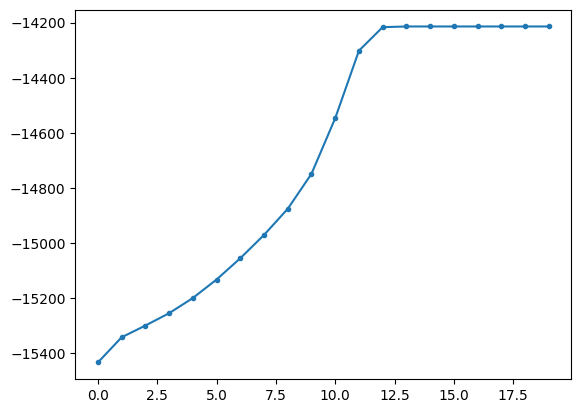

In [16]:
# Plot log-likelihood
plt.plot(log_likelihood[1:], marker='.')

/var/folders/zh/3166vnf95tnblssyvp6rbhyc0000gn/T/ipykernel_17076/3191243685.py:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


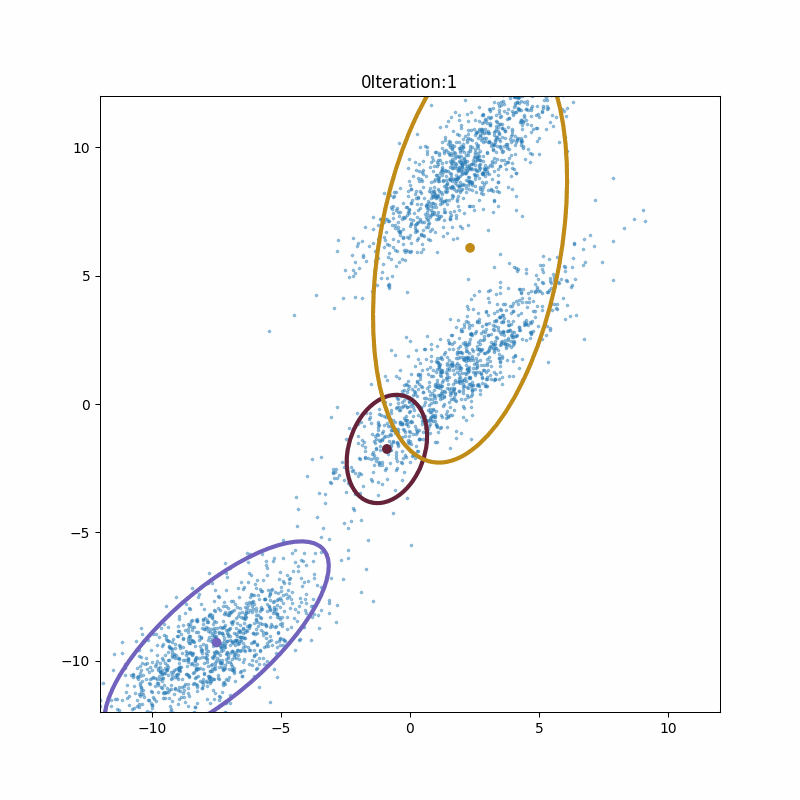

In [17]:
def create_gif(image_folder, gif_base_name, duration=0.5):
    """
    Create a GIF from a set of images in a folder.

    :param image_folder: Folder containing images.
    :param gif_base_name: Base name of the output GIF file.
    :param duration: Duration each image is displayed in the GIF.
    """
    images = []
    for file_name in sorted(os.listdir(image_folder)):
        if file_name.endswith(
                '.png'):  # or '.jpg' if your images are in jpg format
            file_path = os.path.join(image_folder, file_name)
            images.append(imageio.imread(file_path))

    # Create a unique file name for the GIF
    unique_gif_name = f"{gif_base_name}_{int(time.time())}.gif"
    imageio.mimsave(unique_gif_name, images, duration=duration)
    return unique_gif_name


# Example usage
image_folder = './plots'  # Replace with your folder path
gif_base_name = 'output'
unique_gif_name = create_gif(image_folder, gif_base_name, 0.5)

# Display the GIF in Jupyter Notebook
display(Image(filename=unique_gif_name))

In [11]:
sorted(os.listdir('./plots'))

['.DS_Store',
 '000Iteration_1.png',
 '0010Iteration_11.png',
 '0011Iteration_12.png',
 '0012Iteration_13.png',
 '0013Iteration_14.png',
 '0014Iteration_15.png',
 '0015Iteration_16.png',
 '0016Iteration_17.png',
 '0017Iteration_18.png',
 '0018Iteration_19.png',
 '0019Iteration_20.png',
 '001Iteration_2.png',
 '0020Iteration_21.png',
 '0021Iteration_22.png',
 '0022Iteration_23.png',
 '0023Iteration_24.png',
 '0024Iteration_25.png',
 '0025Iteration_26.png',
 '0026Iteration_27.png',
 '0027Iteration_28.png',
 '0028Iteration_29.png',
 '0029Iteration_30.png',
 '002Iteration_3.png',
 '003Iteration_4.png',
 '004Iteration_5.png',
 '005Iteration_6.png',
 '006Iteration_7.png',
 '007Iteration_8.png',
 '008Iteration_9.png',
 '009Iteration_10.png',
 '00Iteration_  0.png']